# Paper Section: Fig of the fine grain extrapolation

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

import os
import sys
from pathlib import Path

import sklearn
import numpy as np
import pandas as pd
from glob import glob

from sklearn import metrics
from math import sqrt

import matplotlib
import matplotlib.pyplot as plt

# Make all python scripts available in the path
sys.path.append('../')

import pp_utils
import lrn_crv_plot
%matplotlib inline

filepath = Path(os.getcwd())
print(filepath)

/vol/ml/apartin/projects/LearningCurves/notebooks


In [2]:
from fit import * # weighted_power_law, fit_weighted_pwr_law
import rpy2.robjects as robjects

In [3]:
save_fig_path = filepath/'figs/fine_grain'
os.makedirs(save_fig_path, exist_ok=True)

def save_fig(save_fig_path, fname):    
    # plt.savefig(save_fig_path/(fname + '.eps'), format='eps')
    plt.savefig(save_fig_path/(fname + '.png'), dpi=200)

In [4]:
def calc_gof(y, yfit):
    gof = {}
    rmse = sqrt( metrics.mean_squared_error(y, yfit) )
    mae = metrics.mean_absolute_error(y, yfit)
    gof['rmse'] = rmse
    gof['mae'] = mae
    return gof

### Get dir path of all runs

In [5]:
src = 'gdsc_on_none'
# src = 'top6_on_none'

# base_dir = Path('/vol/ml/apartin/projects/LearningCurves/trn.gdsc/split_on_none/fine_grain_lgb_subset_even_space')
# base_dir = Path('/vol/ml/apartin/projects/LearningCurves/trn.gdsc/split_on_none/fine_grain_lgb_subset')
base_dir = Path('/vol/ml/apartin/projects/LearningCurves/trn.gdsc/split_on_none/fine_grain_lgb')
    
# Get all run dirs
runs = glob(str(base_dir/'*'))

### Aggregate results over runs

In [6]:
# scores = []
# for i, r in enumerate(runs):
#     dpath = Path(r)/'lrn_crv_scores.csv'
#     if not dpath.exists(): continue
        
#     scr_tmp = pd.read_csv( dpath )
#     scr_tmp.rename(columns={'fold0': 'run'+str(i+1)}, inplace=True)
#     if len(scores)==0:
#         scores = scr_tmp
#     else:
#         scores = scores.merge(scr_tmp, on=['metric', 'tr_size', 'set'])
        
# run_col_names = [c for c in scores.columns if 'run' in c]

# scores_mean   = scores[run_col_names].mean(axis=1)
# scores_median = scores[run_col_names].median(axis=1)
# scores_std    = scores[run_col_names].std(axis=1)

# scores.insert(loc=3, column='mean', value=scores_mean)
# scores.insert(loc=3, column='median', value=scores_median)
# scores.insert(loc=3, column='std', value=scores_std)
# print(len(np.unique(scores.tr_size)))

# display(scores[:2])
# print('Training set sizes:', np.unique(scores.tr_size))

# save = True
# if save:
#     scores.to_csv(base_dir/'all_seed_runs_scores.csv', index=False)

In [7]:
# scores_te = scores[(scores.metric=='mean_absolute_error') & (scores.set=='te')].reset_index(drop=True).iloc[:, :6]
# scores_te.to_csv(base_dir/'scores.csv', index=False)

In [8]:
scores = []
prf = 'id'
for i, r in enumerate(runs):
    # scr_tmp = pd.read_csv( Path(r)/'lrn_crv_scores.csv' )
    dpath = Path(r)/'lrn_crv_scores.csv'
    if not dpath.exists():
        continue
        
    scr_tmp = pd.read_csv( dpath )
    scr_tmp.rename(columns={'fold0': prf+str(i)}, inplace=True)
    if len(scores)==0:
        scores = scr_tmp
    else:
        scores = scores.merge(scr_tmp, on=['metric', 'tr_size', 'set'])
        
run_col_names = [c for c in scores.columns if prf in c]

scores_mean   = scores[run_col_names].mean(axis=1)
scores_median = scores[run_col_names].median(axis=1)
scores_std    = scores[run_col_names].std(axis=1)
# scores_iqr    = iqr(scores.iloc[:, 6:].values, axis=0)

scores.insert(loc=3, column='mean', value=scores_mean)
scores.insert(loc=3, column='median', value=scores_median)
scores.insert(loc=3, column='std', value=scores_std)
print(len(np.unique(scores.tr_size)))

# display(scores[:2])
print('Training set sizes:', np.unique(scores.tr_size))

# scores_te = scores[(scores.metric=='mean_absolute_error') & (scores.set=='te')].reset_index(drop=True).iloc[:, :6]
scores_te = scores[(scores.metric=='mean_absolute_error') & (scores.set=='te')].reset_index(drop=True)

save = True
if save:
    scores.to_csv(base_dir/'all_seed_runs_scores.csv', index=False)
    scores_te.to_csv(base_dir/'scores.csv', index=False)

50
Training set sizes: [   64    72    82    93   106   120   137   156   177   201   228   259
   294   334   380   432   490   557   633   718   816   927  1053  1196
  1358  1543  1752  1990  2261  2568  2916  3312  3762  4273  4853  5512
  6261  7111  8076  9173 10419 11833 13440 15265 17337 19691 22365 25401
 28850 32768]


In [9]:
figsize = (6, 4.5)
metric_name = 'mean_absolute_error'
tr_set = 'te'

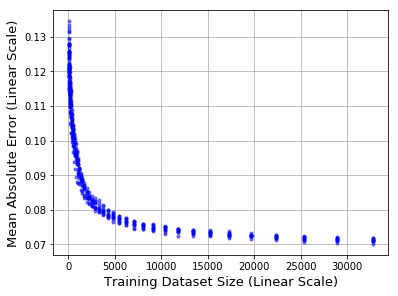

In [10]:
plot_args = {'tr_set': tr_set, 'metric_name': metric_name, 'figsize': figsize, 'xtick_scale': 'linear', 'ytick_scale': 'linear'}
shard_min_idx=0
# shard_min_idx=1

ax = pp_utils.plot_lc_multi_runs( runs, shard_min_idx=shard_min_idx, **plot_args );
# plt.savefig(save_fig_path/f'{src}_all_runs_linlin.png')

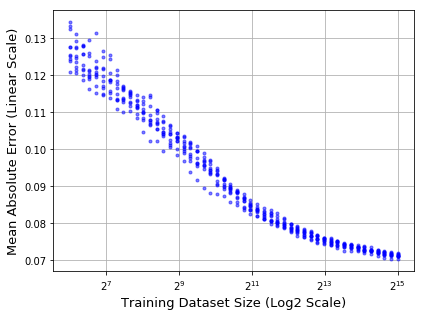

In [11]:
plot_args = {'tr_set': tr_set, 'metric_name': metric_name, 'figsize': figsize, 'xtick_scale': 'log2', 'ytick_scale': 'linear'}
shard_min_idx=0
# shard_min_idx=1

ax = pp_utils.plot_lc_multi_runs( runs, shard_min_idx=shard_min_idx, **plot_args );
plt.tight_layout()
# plt.savefig(save_fig_path/f'{src}_all_runs_loglog.png')
# save_fig(save_fig_path, fname=f'{src}_all_runs_loglog')

- STD of scores across runs is inversely proportional to the subset size. This can be attributed to the distribution similarity of target values between training subset and test set. The target values, is our use case, are the dose-independent values. The smaller the subset, the lower the similarity with a test set, and therefore, we observe larger variance of scores across runs [shuffles/experiments] at smaller subsets.
- We exploit this observation for ... [Mukherjee exploits this observation ...]

In [12]:
figsize = (6, 4.5)
# figsize = (10, 8)
metric_name = 'mean_absolute_error'
xtick_scale, ytick_scale = 'log2', 'linear'

plot_args = {'metric_name': metric_name, 'xtick_scale': xtick_scale, 'ytick_scale': ytick_scale, 'figsize': figsize}

In [68]:
# The previous two figures should help decide which shards to use
shift_idx = 0
shift_idx_end = 37
# scr = scores_te[shift_idx:].reset_index(drop=True)
scr = scores_te[shift_idx:shift_idx_end].reset_index(drop=True)
y_col_name = 'median'

In [69]:
# scores_te = scores[ (scores['metric']==metric_name) & (scores['set']=='te') ].reset_index(drop=True)

# shard_min_idx=0
# # shard_min_idx=1

# ax = None
# ax = lrn_crv_plot.plot_lrn_crv_new(
#         x=scores_te['tr_size'][shard_min_idx:], y=scores_te['median'][shard_min_idx:], yerr=scores_te['std'][shard_min_idx:],
#         ax=ax, ls='--', marker='.', alpha=1,
#         **plot_args, label='Median and STD')

# ax.legend(frameon=True, fontsize=10, loc='best');
# plt.tight_layout()
# # plt.savefig(save_fig_path/f'{src}_agg_median_std.png')

GOF: {'rmse': 0.001774872872052397, 'mae': 0.001261631398604079}


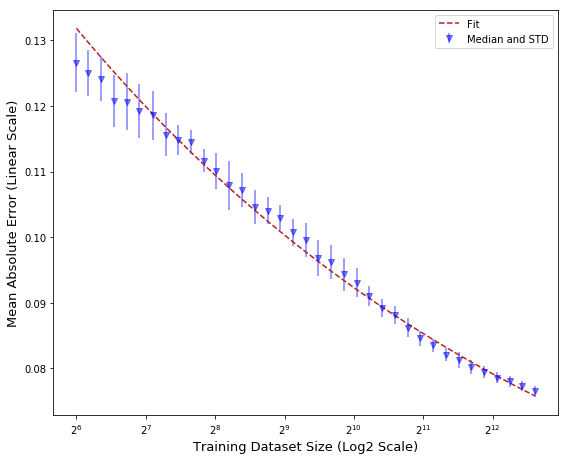

In [70]:
x = scr['tr_size']
y = scr[y_col_name]
yerr = scr['std']

shard_min_idx = 0
xf = x[shard_min_idx:]
yf = y[shard_min_idx:]
prms = fit_params(xf, yf)
yfit = biased_powerlaw(xf, **prms)

ax = None

ax = lrn_crv_plot.plot_lrn_crv_new(x=x, y=y, yerr=yerr,
                                   ax=ax, ls='', marker='v', alpha=0.5,
                                   **plot_args, color='b', label='Median and STD')

ax = lrn_crv_plot.plot_lrn_crv_new(x=xf, y=yfit,
                                   ax=ax, ls='--', marker='', alpha=1,
                                   **plot_args, color='firebrick', label='Fit')

gof = calc_gof(yf, yfit)

ax.legend(frameon=True, fontsize=10, loc='best')
plt.tight_layout()
ax.grid(False)
# ax.set_xticks([2**i for i in range(2, 17)]) # GDSC
# ax.set_xticks([2**i for i in range(2, 18)]) # Top6

# save_fig(save_fig_path, fname=f'{src}_agg_median_std_fit_all')
print('GOF:', gof)

In [71]:
x = scr['tr_size']
y = scr[y_col_name]
yerr = scr['std']

# Fit
shard_min_idx = 5
shard_max_idx = 15
xf = x[shard_min_idx:shard_max_idx]
yf = y[shard_min_idx:shard_max_idx]
prms = fit_params(xf, yf)
yfit = biased_powerlaw(xf, **prms)

Range of m used to fit:  [120 137 156 177 201 228 259 294 334 380]
Extrap point x_ext1:  2916
Extrap point x_ext2:  5512
GOF: {'rmse': 0.001774872872052397, 'mae': 0.001261631398604079}


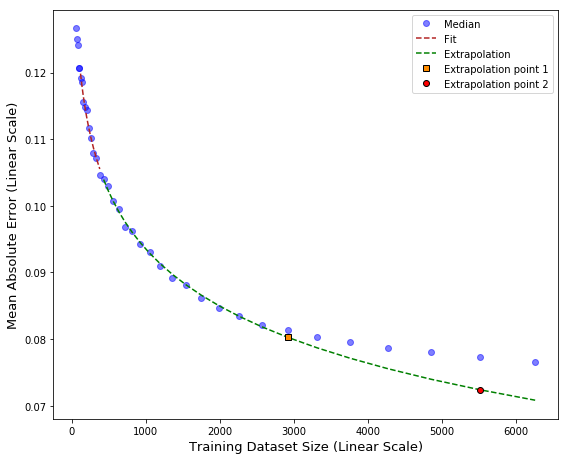

In [76]:
plot_args = {'metric_name': metric_name, 'ytick_scale': 'linear', 'figsize': (8, 6.5)}
xtick_scale = 'linear'
# xtick_scale = 'log2'

ax = None

ax = lrn_crv_plot.plot_lrn_crv_new(x=x, y=y, # yerr=yerr,
                                   ax=ax, ls='', marker='o', alpha=0.5,
                                   **plot_args, xtick_scale = xtick_scale, color='b', label='Median')

ax = lrn_crv_plot.plot_lrn_crv_new(x=xf, y=yfit,
                                   ax=ax, ls='--', marker='', alpha=1,
                                   **plot_args, xtick_scale = xtick_scale, color='firebrick', label='Fit')

xf_ = x[shard_max_idx:]
# yf_ = y[shard_max_idx:]
yfit_ = biased_powerlaw(xf_, **prms)
ax = lrn_crv_plot.plot_lrn_crv_new(x=xf_, y=yfit_,
                                   ax=ax, ls='--', marker='', alpha=1,
                                   **plot_args, xtick_scale = xtick_scale, color='g', label='Extrapolation')

x_id_ext1 = shard_max_idx + 15
x_id_ext2 = shard_max_idx + 20
x_ext1 = x[x_id_ext1]
x_ext2 = x[x_id_ext2]
y_ext1 = biased_powerlaw(x_ext1, **prms)
y_ext2 = biased_powerlaw(x_ext2, **prms)
ax.plot(x_ext1, y_ext1, 's', color='darkorange', markeredgecolor='k', alpha=1, label='Extrapolation point 1')  # darkviolet
ax.plot(x_ext2, y_ext2, 'o', color='r', markeredgecolor='k', alpha=1, label='Extrapolation point 2')

print('Range of m used to fit: ', xf.values)
print('Extrap point x_ext1: ', x_ext1)
print('Extrap point x_ext2: ', x_ext2)

# print('GOF for extrap 1', calc_gof(yf, y_ext1))
# gof = calc_gof(yf, yfit)
# gof = calc_gof(yf, yfit)

ax.legend(frameon=True, fontsize=10, loc='best')
plt.tight_layout()
ax.grid(False)
# ax.set_xticks([2**i for i in range(2, 17)]) # GDSC
# ax.set_xticks([2**i for i in range(2, 18)]) # Top6

save_fig(save_fig_path, fname=f'{src}fine_grain_extrap_{xtick_scale}')
print('GOF:', gof)

In [73]:
# tot_pnts = len(scores_te['tr_size'])
# n_pnts_fit = 70 # Number of points to use for curve fitting starting from the largest size

# y_col_name = 'median'

# ax = None

# ax = lrn_crv_plot.plot_lrn_crv_new(
#         x=scores_te['tr_size'][0:], y=scores_te[y_col_name][0:], yerr=scores_te['std'][0:],
#         ax=ax, ls='', marker='v', alpha=0.7,
#         **plot_args, label='Median Values')

# shard_min_idx = 0 if tot_pnts < n_pnts_fit else tot_pnts - n_pnts_fit

# ax, _, gof = lrn_crv_plot.plot_lrn_crv_power_law(
#         x=scores_te['tr_size'][shard_min_idx:], y=scores_te[y_col_name][shard_min_idx:],
#         **plot_args, plot_raw=False, ax=ax, alpha=1 );

# ax.legend(frameon=True, fontsize=10, loc='best')
# plt.tight_layout()
# # plt.savefig(save_fig_path/f'{src}_agg_median_std_fit_subset_points.png')

# print('GOF:', gof)

# Fig: Fine-grain extrapolation

In [47]:
# scr = scores_te.copy()
# # scr = scores_te.copy().reset_index(drop=True)
# # scr = scores_te.copy().iloc[5:, :].reset_index(drop=True)
# # scr = scores_te.copy().iloc[shift:-20, :].reset_index(drop=True)

# # plot_args['figsize'] = (11, 8)
# plot_args['figsize'] = (7, 4.5)
# tot_pnts = len(scr['tr_size'])

# x_fit_min = 0  # good start
# x_fit_max = 10 # good end
# # x_ext = 28     # good extrapolation
# x_ext = 35   # bad extrapolation
# print('x_fit_min={}, m={}'.format(x_fit_min, scr.loc[x_fit_min, 'tr_size']))
# print('x_fit_max={}, m={}'.format(x_fit_max, scr.loc[x_fit_max, 'tr_size']))
# print('ext={}, m={}'.format(x_fit_max, scr.loc[x_ext, 'tr_size']))

# y_col_name = 'median'
# plot_args['xtick_scale'], plot_args['ytick_scale'] = 'linear', 'linear'
# # plot_args['xtick_scale'], plot_args['ytick_scale'] = 'log2', 'log2'

# ax = None
# ax = lrn_crv_plot.plot_lrn_crv_new(
#         x = scr['tr_size'], y = scr[y_col_name], # yerr = scr['std'],
#         ax=ax, ls='', marker='.', alpha=0.8, # color='k',
#         **plot_args, label='Excluded Points')

# ax = lrn_crv_plot.plot_lrn_crv_new(
#         x = scr.loc[x_fit_min:x_fit_max, 'tr_size'], y = scr.loc[x_fit_min:x_fit_max, y_col_name],
#         ax=ax, ls='', marker='*', alpha=0.8, # color='c',
#         **plot_args, label='Fitting Points')

# ax, fit_prms, gof = lrn_crv_plot.plot_lrn_crv_power_law(
#         x=scr.loc[x_fit_min:x_fit_max, 'tr_size'], y=scr.loc[x_fit_min:x_fit_max, y_col_name],
#         **plot_args, plot_raw=False, ax=ax, alpha=1 );

# y_ext = lrn_crv_plot.power_law_func_3prm(x=scr.loc[x_ext, 'tr_size'], **fit_prms)

# ext_mae = abs(y_ext - scr.loc[x_ext, y_col_name])
# print('Extrapolation MAE', ext_mae)

# ax = lrn_crv_plot.plot_lrn_crv_new(
#         x = np.array(scr.loc[x_ext, 'tr_size']), y = y_ext,
#         ax=ax, ls='', marker='o', alpha=0.8, color='r',
#         **plot_args, label='Extrapolated')

# plt.tight_layout()
# ax.legend(frameon=True, fontsize=10, loc='best');
# # save_fig(save_fig_path, fname=f'{src}_fine_grain_extrap_linling')

# Worked for fine_grain_subset

Could not fit power-law.


TypeError: 'NoneType' object is not iterable

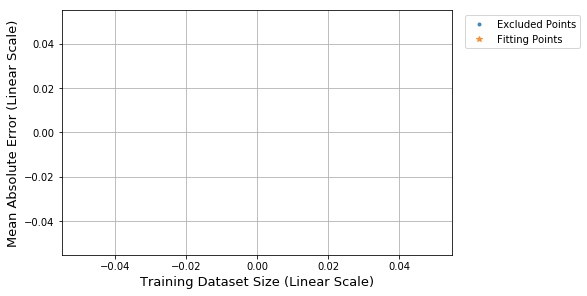

In [12]:
scr = scores_te.copy()
# scr = scores_te.copy().reset_index(drop=True)
# scr = scores_te.copy().iloc[5:, :].reset_index(drop=True)
shift = 0
shift = 20
scr = scores_te.copy().iloc[shift:-20, :].reset_index(drop=True)
# plot_args['figsize'] = (11, 8)
plot_args['figsize'] = (7, 4.5)
tot_pnts = len(scr['tr_size'])
# fit_min = 20  # good start
# fit_max = 42  # good end

fit_min = 20-shift  # good start
fit_max = 42-shift  # good end

y_col_name = 'median'
plot_args['xtick_scale'], plot_args['ytick_scale'] = 'linear', 'linear'
# plot_args['xtick_scale'], plot_args['ytick_scale'] = 'log2', 'log2'

ax = None
ax = lrn_crv_plot.plot_lrn_crv_new(
        x = scr['tr_size'], y = scr[y_col_name], # yerr = scr['std'],
        ax=ax, ls='', marker='.', alpha=0.8, # color='k',
        **plot_args, label='Excluded Points')

ax = lrn_crv_plot.plot_lrn_crv_new(
        x = scr.loc[fit_min:fit_max, 'tr_size'], y = scr.loc[fit_min:fit_max, y_col_name], # yerr = scr.loc[fit_min:fit_max, 'std'],
        ax=ax, ls='', marker='*', alpha=0.8, # color='c',
        **plot_args, label='Fitting Points')

ax, fit_prms, gof = lrn_crv_plot.plot_lrn_crv_power_law(
        x=scr.loc[fit_min:fit_max, 'tr_size'], y=scr.loc[fit_min:fit_max, y_col_name],
        **plot_args, plot_raw=False, ax=ax, alpha=1 );

print('fit_min_id={}, m={}'.format(fit_min, scr.loc[fit_min, 'tr_size']))
print('fit_max_id={}, m={}'.format(fit_max, scr.loc[fit_max, 'tr_size']))
# x_ext = 52-shift  # good extrapolation -->
x_ext = 70-shift  # bad extrapolation -->
print('ext={}, m={}'.format(fit_max, scr.loc[x_ext, 'tr_size']))
y_ext = lrn_crv_plot.power_law_func_3prm(x=scr.loc[x_ext, 'tr_size'], **fit_prms)

ext_mae = abs(y_ext - scr.loc[x_ext, y_col_name])
print('Extrapolation MAE', ext_mae)

ax = lrn_crv_plot.plot_lrn_crv_new(
        x = np.array(scr.loc[x_ext, 'tr_size']), y = y_ext,
        ax=ax, ls='', marker='o', alpha=0.8, color='r',
        **plot_args, label='Extrapolated')

plt.tight_layout()
ax.legend(frameon=True, fontsize=10, loc='best')
save_fig(save_fig_path, fname=f'{src}_fine_grain_extrap_linling')